## Is it correct to fit a simple SIR to our model's equations?

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import xlrd
from scipy import stats
import matplotlib.cm as cm
import matplotlib.colors as mcolors

Simple SIR model:

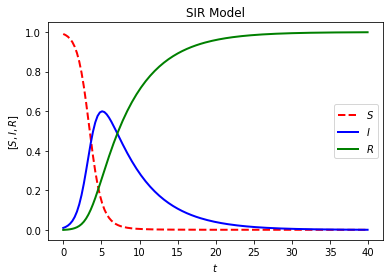

In [2]:
#Initial conditions and t range
t = np.arange(0,40, 0.3)
k0=[1 - 0.01, 0.01, 0] #normalized population

#Differential equation
eta = 1.5
gamma = 0.2
def f(k,t):
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S
    dIdt = eta*I*S - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]


#Solve
k_s = odeint(f,k0,t)

#Plotting
plt.plot(t,k_s[:,0],'r--', linewidth=2.0)
plt.plot(t,k_s[:,1],'b-', linewidth=2.0)
plt.plot(t,k_s[:,2],'g-', linewidth=2.0)

#print(k[20, 0])
plt.title("SIR Model")    #'$\u03B2 =$ {}, $\gamma =$ {}'.format(eta, gamma))
plt.xlabel("$t$")
plt.ylabel("$[S, I, R]$")
plt.legend(["$S$","$I$", "$R$"])

# plt.savefig('sir.png', dpi = 1200)

Divied population with varios $\beta$ differentiation:

In [3]:
gamma = 1/14
delta = 1
betam = 7/14

def equations(k,t):
    betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

    ST, IT, RT = k[0], k[1], k[2]
    SM, IM, RM = k[3], k[4], k[5]
    SL, IL, RL = k[6], k[7], k[8]
    I = IT + IM + IL
    S = ST + SM + SL
    #top
    dSTdt = -1*betat*I*ST
    dITdt = betat*I*ST - gamma*IT
    dRTdt = gamma*IT
    #medium
    dSMdt = -1*betam*I*SM
    dIMdt = betam*I*SM - gamma*IM
    dRMdt = gamma*IM
    #low
    dSLdt = -1*betal*I*SL
    dILdt = betal*I*SL - gamma*IL
    dRLdt = gamma*IL
    
    return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]

In [53]:
#Initial conditions and t range
t  =  np.arange(0,55, 0.001)
k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]

#Solve
k = odeint(equations,k0,t)

Itot = k[:, 1]+k[:, 4]+k[:, 7]

In [58]:
def find_range(cases):
    begin = 0 
    end = np.size(cases)-1
    for i in range(1, end):
        if cases[i] != 0 and begin == 0:
            begin = i
        if begin != 0:
            if i <= 3: shift = 1
            else: shift = i - 3

            if cases[i] < np.average(cases[shift:i]):
                end = i
                break
    end = int(end - end/2)
    return begin, end

Text(0.5, 1.0, 'Infected people in time')

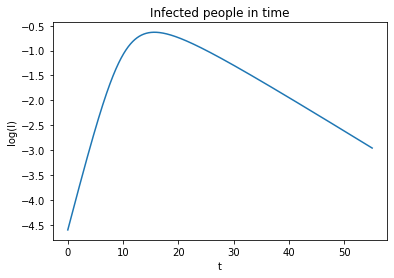

In [59]:
plt.plot(t, np.log(Itot))

plt.ylabel('log(I)')
plt.xlabel('t')
plt.title('Infected people in time')

In [60]:
def fit_equation(cases): 
    begin, end = find_range(cases)
    betaSgamma = np.polyfit(t[begin:end], np.log(list(cases[begin:end])), 1)[0] #should be corrected in the originial code
    return betaSgamma

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 1.0, 'Infected people in the fit range')

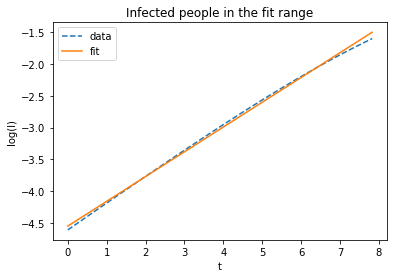

In [61]:
begin, end = find_range(Itot)
a, b = np.polyfit(t[begin:end], np.log(list(Itot[begin:end])), 1)

plt.plot(t[begin:end], np.log(list(Itot[begin:end])), '--', label = 'data')
plt.plot(t[begin:end], a * t[begin:end] + b, label = 'fit')

plt.legend()
plt.ylabel('log(I)')
plt.xlabel('t')
plt.title('Infected people in the fit range')

In [62]:
fit_equation(Itot)

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.3883045021475272

In [63]:
def find_beta(cases):
    population = 1
    return (fit_equation(cases) + gamma)/population

In [89]:
find_beta(Itot)

0.4597330735760986

In [74]:
eta = find_beta(Itot)
gamma = 1/14

def f(k,t):
    S = k[0]
    I = k[1]
    R = k[2]
    dSdt = -1*eta*I*S
    dIdt = eta*I*S - gamma*I
    dRdt = gamma*I
    return [dSdt, dIdt, dRdt]

k0 = [1-0.01, 0.01, 0]
k_s = odeint(f,k0,t)

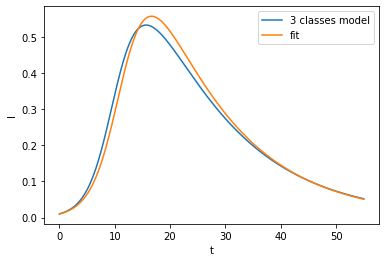

In [75]:
plt.plot(t, Itot, label = '3 classes model')
plt.plot(t, k_s[:, 1], label = 'fit')

plt.xlabel('t')
plt.ylabel('I')
plt.legend()

In [72]:
#linear plot in range of the fitted data
#Error 
#define least square and look for the best range for other parameters

error = sum(abs(Itot - k_s[:, 1]))

error

814.512498911944

In [171]:
gamma = 1/14
t  =  np.arange(0,100, 0.05)
def find_error(betam, delta):
    def equations(k,t):
        betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

        ST, IT, RT = k[0], k[1], k[2]
        SM, IM, RM = k[3], k[4], k[5]
        SL, IL, RL = k[6], k[7], k[8]
        I = IT + IM + IL
        S = ST + SM + SL
        #top
        dSTdt = -1*betat*I*ST
        dITdt = betat*I*ST - gamma*IT
        dRTdt = gamma*IT
        #medium
        dSMdt = -1*betam*I*SM
        dIMdt = betam*I*SM - gamma*IM
        dRMdt = gamma*IM
        #low
        dSLdt = -1*betal*I*SL
        dILdt = betal*I*SL - gamma*IL
        dRLdt = gamma*IL

        return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]
    #Initial conditions and t range
    k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]
    #Solve
    k = odeint(equations,k0,t)
    Itot = k[:, 1]+k[:, 4]+k[:, 7]
    
    beta = find_beta(Itot)

    def SIR(k,t):
        S = k[0]
        I = k[1]
        R = k[2]
        dSdt = -1*beta*I*S
        dIdt = beta*I*S - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]

    k0 = [1-0.01, 0.01, 0]
    k_s = odeint(SIR,k0,t)
    
    return sum(abs(Itot - k_s[:, 1]))

In [172]:
find_error(0.5, 1)

C:\Users\ASUS\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\ASUS\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


17.045765703727962

In [175]:
%%time

delta_range = np.arange(0, 1, 0.05)
betam_range = np.arange(0.1, 1.2, 0.05)

error = []
for delta in delta_range:
    for betam in betam_range:
        error.append(find_error(betam, delta))

error

Wall time: 9.95 s


[11.888929557875713,
 22.88006887517715,
 27.631250493993846,
 27.501327090570154,
 26.17058485063704,
 24.728834721790836,
 23.27875928310384,
 22.04615379300164,
 20.823242172082075,
 19.664192820199407,
 18.802594638476616,
 17.800745713094027,
 17.073390663507034,
 16.390131879141418,
 15.811840476815368,
 15.391740796621011,
 14.80456681102423,
 14.065734631984725,
 13.961110709370761,
 13.361848388492769,
 13.061510453818116,
 12.676996917386004,
 11.8831545005954,
 22.86520809054422,
 27.616980246044736,
 27.48125388550978,
 26.146407969621315,
 24.70254788835403,
 23.251714178201855,
 22.01920502198154,
 20.79695966011562,
 19.638883173320707,
 18.778461530374937,
 17.777699818673586,
 17.051521185113604,
 16.369411133216847,
 15.792134911941341,
 15.373042044288539,
 14.78674630672117,
 14.04865010906688,
 13.944854174314814,
 13.346194441157483,
 13.046503440424503,
 12.66263394855031,
 11.865840631882024,
 22.821144543452647,
 27.574783092634156,
 27.421532433383035,
 26.074

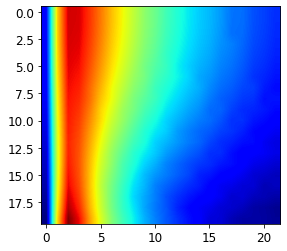

In [176]:
error = np.array(error)
Error = error.reshape(len(delta_range), len(betam_range))

plt.imshow(Error, interpolation='bilinear', cmap = cm.jet)

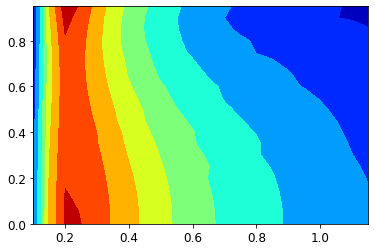

In [177]:
plt.contourf(betam_range, delta_range, Error, cmap = cm.jet)

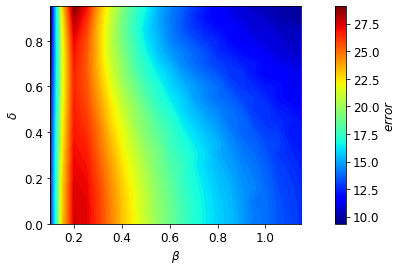

In [178]:
plt.contourf(betam_range, delta_range, Error, 100, cmap = cm.jet)

plt.ylabel('$\delta$')
plt.xlabel('$\u03B2$')

normalize = mcolors.Normalize(vmin=np.min(error), vmax=np.max(error))
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(error)
fig.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = None 
cbar = plt.colorbar(scalarmappaple, orientation="vertical", pad=0.1, cax=cbar_ax) 
cbar.set_label('$error$')


In [179]:
%%time

delta_range = np.arange(0, 1.5, 0.1)
betam_range = np.arange(0.1, 1.2, 0.1)

error = []
for delta in delta_range:
    for betam in betam_range:
        error.append(find_error(betam, delta))

Wall time: 3.68 s


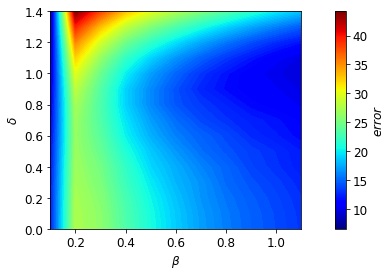

In [181]:
error = np.array(error)
Error = error.reshape(len(delta_range), len(betam_range))

plt.contourf(betam_range, delta_range, Error, 100, cmap = cm.jet)


plt.ylabel('$\delta$')
plt.xlabel('$\u03B2$')


normalize = mcolors.Normalize(vmin=np.min(error), vmax=np.max(error))
colormap = cm.jet

scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(error)
fig.subplots_adjust(bottom=0.1, wspace=1, hspace=None)
cbar_ax = None 
cbar = plt.colorbar(scalarmappaple, orientation="vertical", pad=0.1, cax=cbar_ax) 
cbar.set_label('$error$')

In [164]:
gamma = 1/14

def diff_plot(betam, delta):
    def equations(k,t):
        betat, betal = betam * (1 - 0.5 * delta), betam * (1 + 0.5 * delta) #symmetry

        ST, IT, RT = k[0], k[1], k[2]
        SM, IM, RM = k[3], k[4], k[5]
        SL, IL, RL = k[6], k[7], k[8]
        I = IT + IM + IL
        S = ST + SM + SL
        #top
        dSTdt = -1*betat*I*ST
        dITdt = betat*I*ST - gamma*IT
        dRTdt = gamma*IT
        #medium
        dSMdt = -1*betam*I*SM
        dIMdt = betam*I*SM - gamma*IM
        dRMdt = gamma*IM
        #low
        dSLdt = -1*betal*I*SL
        dILdt = betal*I*SL - gamma*IL
        dRLdt = gamma*IL

        return [dSTdt, dITdt, dRTdt, dSMdt, dIMdt, dRMdt, dSLdt, dILdt, dRLdt]
    #Initial conditions
    k0 = [0.33, 0.01, 0, 0.33, 0, 0, 0.33, 0, 0]
    #Solve
    k = odeint(equations,k0,t)
    Itot = k[:, 1]+k[:, 4]+k[:, 7]
    
    beta = find_beta(Itot)

    def SIR(k,t):
        S = k[0]
        I = k[1]
        R = k[2]
        dSdt = -1*beta*I*S
        dIdt = beta*I*S - gamma*I
        dRdt = gamma*I
        return [dSdt, dIdt, dRdt]

    k0 = [1-0.01, 0.01, 0]
    k_s = odeint(SIR,k0,t)
    
    plt.plot(t, Itot, label = '3 classes model')
    plt.plot(t, k_s[:, 1], label = 'fit')

    plt.xlabel('t')
    plt.ylabel('I')
    plt.legend()


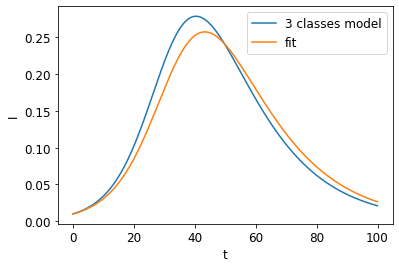

In [182]:
delta = 0
betam = 0.2
t  =  np.arange(0,100, 0.05)
diff_plot(betam, delta)

In [183]:
#Theory error
#Addadi error